# Feature Scalling 
1. Standardization
2. Normalization 
3. Unit vector 

## 1. Standardization

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


we will use z score method for this (xi-xmean)/std

In [40]:

def z_score(x):
    nor=[]
    for i in x:
        z_sc=(i-np.mean(x))/np.std(x)
        nor.append(z_sc)
    return nor
pd.DataFrame(z_score(list(df['total_bill'])),columns=['Standedized_total_bill'])

,Standedized_total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [15]:
df2=pd.DataFrame(z_score(list(df['total_bill'])),columns=['Standedized_total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

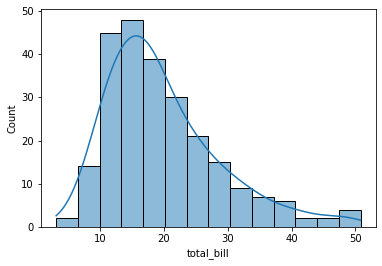

In [16]:
sns.histplot(df['total_bill'],kde=True)

<AxesSubplot:xlabel='Standedized_total_bill', ylabel='Count'>

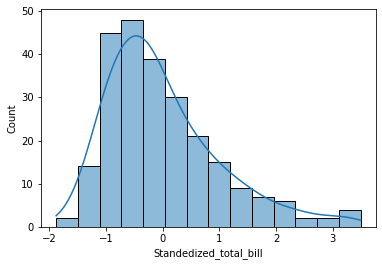

In [17]:
sns.histplot(df2['Standedized_total_bill'],kde=True)

Note : Probability distribution remains same but values have scaled down majorly from [-3,3]

In [19]:
# we can use sklearn libray to use standerdization 
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [27]:
scaler.fit(df[['total_bill']]) # calculating mean and std in fit method

StandardScaler()

In [28]:
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [30]:
# we can use directly fit_transform methos 
scaler.fit_transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [41]:
# we can use it for multiple columns 
df2=pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns=['bill_z','tips_z'])

In [43]:
df2.mean(),df2.std()

(bill_z   -6.597637e-17
 tips_z    2.846297e-16
 dtype: float64,
 bill_z    1.002056
 tips_z    1.002056
 dtype: float64)

In [54]:
# for any new data 
scaler.transform([[45,56]])

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.83809433, 38.38479366]])

## 2. Normalization : Min Max scaler

In [44]:
df=sns.load_dataset('taxis')

In [45]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
min_max=MinMaxScaler()


In [52]:
min_max.fit_transform(df[['fare','tip','tolls']])

array([[0.04026846, 0.06475904, 0.        ],
       [0.02684564, 0.        , 0.        ],
       [0.04362416, 0.07108434, 0.        ],
       ...,
       [0.10067114, 0.        , 0.        ],
       [0.03355705, 0.        , 0.        ],
       [0.09395973, 0.10120482, 0.        ]])

Note: Values will be vonverted to between 0 and 1

In [56]:
min_max.transform([[3,4,5]])

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.01342282, 0.12048193, 0.20815987]])

# 3. Unit vector 

In [60]:
from sklearn.preprocessing import normalize


In [61]:
normalize(df[['fare','tip','tolls']])

array([[0.95592652, 0.293606  , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.95388972, 0.3001573 , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97581829, 0.2185833 , 0.        ]])

In [64]:
df3=pd.DataFrame(normalize(df[['fare','tip','tolls']]),columns=['A','B','C'])
df3

,A,B,C
0,0.955927,0.293606,0.0
1,1.000000,0.000000,0.0
2,0.953890,0.300157,0.0
3,0.975026,0.222089,0.0
4,0.992614,0.121319,0.0
...,...,...,...
6428,0.973360,0.229280,0.0
6429,1.000000,0.000000,0.0
6430,1.000000,0.000000,0.0
6431,1.000000,0.000000,0.0
